<a href="https://colab.research.google.com/github/JanneWald/CS3960/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Linear Regression

For this assignment, we will implement Linear Regression as learned in class. We will use an analytical approach and a gradient descent approach for this assignment, respectively.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target
print("features:", X.shape)
print("labels:", y.shape)

# TODO: Split the dataset into training and testing sets
# You may use train_test_split in sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("training data:", X_train.shape, y_train.shape)
print("test data:",     X_test.shape,  y_test.shape)

features: (442, 10)
labels: (442,)
training data: (353, 10) (353,)
test data: (89, 10) (89,)


## Analytical Approach

For this part, you will use the analytical approach to implement a linear regression model, where the model weights are directly computed from the training data. Please refer to the course slides about how to obtain the weights.

In [ ]:
# TODO: Create a bias vector and integrate it to the input matrix
bias = np.ones((X_train.shape[0], 1))
X_train_w_bias = np.hstack([bias, X_train])
X_test_w_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# TODO: Compute the weights for the linear regression model
weights_w_bias = np.linalg.inv(X_train_w_bias.T @ X_train_w_bias) @ X_train_w_bias.T @ y_train

# TODO: Make predictions on the test data using the weights
y_pred = X_test_w_bias @ weights_w_bias

# TODO: Evaluate the predicted reuslts using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2900.1936284934795


/tmp/ipython-input-45567194.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


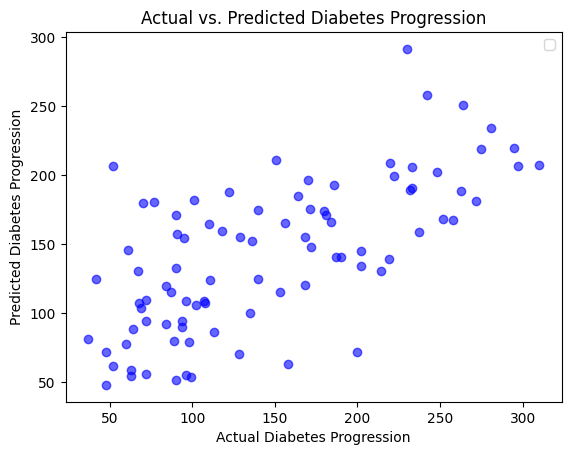

In [ ]:
# TODO: Visualize the model's performance with the regression line
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs. Predicted Diabetes Progression")
plt.legend()
plt.show()

Weights: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Bias: 151.34560453986003


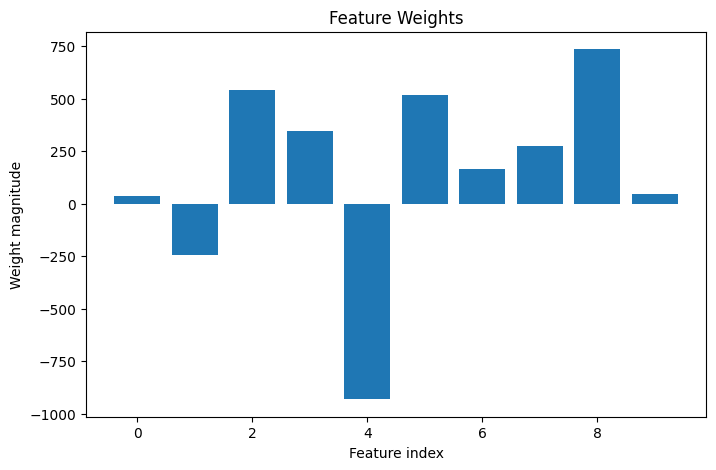

Most important feature: 4 with weight -931.4888
Least important feature: 0 with weight 37.9040


In [ ]:
# Separate and print the model weight parameters
# weights (coefficients)
weights = weights_w_bias[1:]
# bias( intercept)
bias = weights_w_bias[0]
print("Weights:", weights)
print("Bias:", bias)

# TODO: Plot a histogram chart to visualize the parameters
plt.figure(figsize=(8,5))
plt.bar(range(len(weights)), weights)
plt.xlabel("Feature index")
plt.ylabel("Weight magnitude")
plt.title("Feature Weights")
plt.show()

# TODO: Show the most and least important parameters
most_important_idx = np.argmax(np.abs(weights))
least_important_idx = np.argmin(np.abs(weights))

print(f"Most important feature: {most_important_idx} with weight {weights[most_important_idx]:.4f}")
print(f"Least important feature: {least_important_idx} with weight {weights[least_important_idx]:.4f}")

## Gradient Descent Approach

For this part, you will use a gradient descent approach to implement a linear regression model for the same diabetes dataset. Please refer to the course slides about the gradient calculation and update.

In [ ]:
# TODO: Determine learning rate, and training epochs
lr = 0.1        # Try options from 0.1 to 1e-4
num_steps = 20   # Try options from 5 to 20

# TODO: Initialize model parameters
weights = np.zeros(X_train.shape[1])
bias = 0

In [ ]:
# Model training
for step in range(num_steps):
  # Predictions on training data
  y_pred_train = X_train @ weights + bias
  error = y_pred_train - y_train

  # TODO: Compute gradients on weights and bias
  grad_weights = (2 / len(y_train)) * (X_train.T @ error)
  grad_bias = (2 / len(y_train)) * np.sum(error)

  # TODO: Apply gradient descent on the weights using learning rate
  weights -= lr * grad_weights
  bias -= lr * grad_bias

  # TODO: Calculate Mean Squared Error during training
  mse = mean_squared_error(y_train, y_pred_train)
  print("Training error:", mse)

Training error: 29711.32294617564
Training error: 21193.179569994478
Training error: 15738.754462305393
Training error: 12245.104636710506
Training error: 10006.351392307479
Training error: 8570.735428002463
Training error: 7649.132743164782
Training error: 7056.505215639457
Training error: 6674.429228693183
Training error: 6427.114156749963
Training error: 6266.054301534788
Training error: 6160.206198579645
Training error: 6089.702136506297
Training error: 6041.82683696307
Training error: 6008.442547445446
Training error: 5984.341112004105
Training error: 5966.189303731703
Training error: 5951.853842183783
Training error: 5939.969407490787
Training error: 5929.662171285677


In [ ]:
# TODO: Make predictions on the test data
y_pred = X_test @ weights + bias

# TODO: Calculate Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)

Mean Squared Error: 5187.758207571186


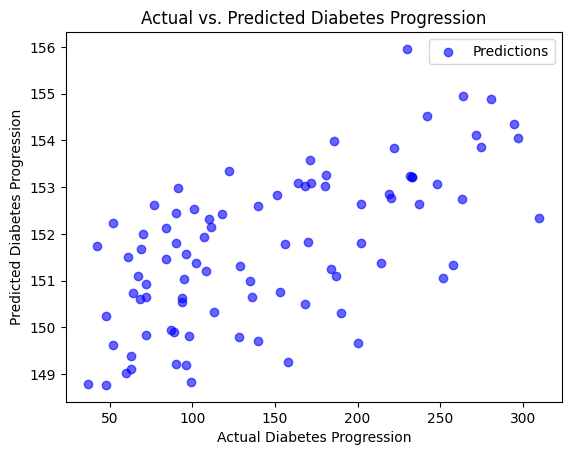

In [ ]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predictions")

plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs. Predicted Diabetes Progression")
plt.legend()
plt.show()

Weights: [ 2.99684729  0.09640059  9.05817895  6.80261533  2.80114778  2.09561551
 -5.69022596  6.26417437  8.2892722   6.06457816]
Bias: 151.92264760796652


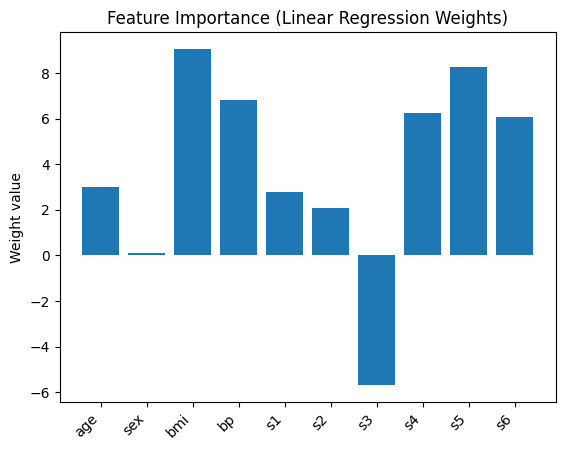

Most important: bmi with weight: 9.058178953436709
Least important: sex with weight: 0.09640059379877151


In [ ]:
# Print the model weight parameters
print("Weights:", weights)
print("Bias:", bias)

# TODO: Plot a histogram chart to visualize the parameters
feature_names = load_diabetes().feature_names # ye that took me a sec to find out where to get those


plt.bar(feature_names, weights)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Weight value")
plt.title("Feature Importance (Linear Regression Weights)")
plt.show()

# Highest and Lowest weights

most_important_idx = np.argmax(np.abs(weights))
least_important_idx = np.argmin(np.abs(weights))

print("Most important:", feature_names[most_important_idx], "with weight:", weights[most_important_idx])
print("Least important:", feature_names[least_important_idx], "with weight:", weights[least_important_idx])

## Use a new dataset california housing to train a linear regression model

* Load the dataset from fetch_california_housing [1 point]
* Train a linear regression model using gradient descent [4 points]
* Report the model's performance on the test set [2 points].
* For this dataset, how do the data split (try 20/80 and 50/50 training/test split ratios) and hyper-parameters (learning rate, training epochs) affect the outcome? Show and interpret your results [6 points].




In [ ]:
from sklearn.datasets import fetch_california_housing

# TODO: Load the dataset, train a linear regression model using gradient descent,
# and evaluate the model's performance on the test set

def train_and_plot(lr, testing_size, epochs):
  # Load the diabetes dataset
  data = fetch_california_housing()
  X = data.data
  y = data.target
  # print("features:", X.shape)
  # print("labels:", y.shape)

  # TODO: Split the dataset into training and testing sets
  # You may use train_test_split in sklearn
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testing_size, random_state=42)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # print("training data:", X_train.shape, y_train.shape)
  # print("test data:",     X_test.shape,  y_test.shape)

  # TODO: Determine learning rate, and training epochs
  # lr = 0.1        # Try options from 0.1 to 1e-4
  num_steps = epochs   # Try options from 5 to 20

  # TODO: Initialize model parameters
  weights = np.zeros(X_train.shape[1])
  bias = 0

  # Model training
  for step in range(num_steps):
    # Predictions on training data
    y_pred_train = X_train @ weights + bias
    error = y_pred_train - y_train

    # TODO: Compute gradients on weights and bias
    grad_weights = (2 / len(y_train)) * (X_train.T @ error)
    grad_bias = (2 / len(y_train)) * np.sum(error)

    # TODO: Apply gradient descent on the weights using learning rate
    weights -= lr * grad_weights
    bias -= lr * grad_bias

    # TODO: Calculate Mean Squared Error during training
    mse = mean_squared_error(y_train, y_pred_train)
    # print("Training error:", mse)

  # TODO: Make predictions on the test data
  y_pred = X_test @ weights + bias

  # TODO: Calculate Mean Squared Error for evaluation
  mse = mean_squared_error(y_test, y_pred)

  # Print the evaluation metrics
  print("Mean Squared Error:", mse)
  return mse

min_mse = None
min_mse_args = None
max_mse = None
max_mse_args = None

for lr in [0.1, 0.01, 0.001]:
  for test_size in [0.2, 0.5]:
    for epoch in [10, 20, 80]:

      print((lr, test_size, epoch))
      mse = train_and_plot(lr, test_size, epoch)

      if min_mse is None or mse < min_mse:
          min_mse = mse
          min_mse_args = (lr, test_size, epoch)

      if max_mse is None or mse > max_mse:
          max_mse = mse
          max_mse_args = (lr, test_size, epoch)


print('====================')
print(f'Minimum mse was {min_mse} with a learning rate of {min_mse_args[0]}, a test split percentage of {min_mse_args[1]}, and an epoch of {min_mse_args[2]}')
print(f'Maximum mse was {max_mse} with a learning rate of {max_mse_args[0]}, a test split percentage of {max_mse_args[1]}, and an epoch of {max_mse_args[2]}')


Mean Squared Error: 0.6885130411429891
(0.1, 0.2, 10) 0.6885130411429891
Mean Squared Error: 0.6062198295642781
(0.1, 0.2, 20) 0.6062198295642781
Mean Squared Error: 0.556318357165846
(0.1, 0.2, 80) 0.556318357165846
Mean Squared Error: 0.6807010474158487
(0.1, 0.5, 10) 0.6807010474158487
Mean Squared Error: 0.5953372772368482
(0.1, 0.5, 20) 0.5953372772368482
Mean Squared Error: 0.5380112077966921
(0.1, 0.5, 80) 0.5380112077966921
Mean Squared Error: 3.903491969981432
(0.01, 0.2, 10) 3.903491969981432
Mean Squared Error: 2.818902890606026
(0.01, 0.2, 20) 2.818902890606026
Mean Squared Error: 0.829707169044079
(0.01, 0.2, 80) 0.829707169044079
Mean Squared Error: 3.961819271890579
(0.01, 0.5, 10) 3.961819271890579
Mean Squared Error: 2.8584467526403894
(0.01, 0.5, 20) 2.8584467526403894
Mean Squared Error: 0.8268501429932181
(0.01, 0.5, 80) 0.8268501429932181
Mean Squared Error: 5.340629472898958
(0.001, 0.2, 10) 5.340629472898958
Mean Squared Error: 5.155472823221366
(0.001, 0.2, 20) 


Just to note, I had to scale these because long/lat was breaking mean squared:
```
Mean Squared Error: 7.760924875332445e+76
Mean Squared Error: 2.3863526746455766e+153
Mean Squared Error: inf
Mean Squared Error: 8.108055687240369e+76
Mean Squared Error: 2.594532528472766e+153

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)

Mean Squared Error: inf
Mean Squared Error: 7.554272369756818e+56
Mean Squared Error: 2.260960354476113e+113
Mean Squared Error: 2.025319587088564e+226
Mean Squared Error: 7.892584649857715e+56
Mean Squared Error: 2.458465800884478e+113
Mean Squared Error: 2.3853604646437495e+226
Mean Squared Error: 5.755804553931643e+36
Mean Squared Error: 1.3125617541379732e+73
Mean Squared Error: 6.825699419818821e+145
Mean Squared Error: 6.016858824802231e+36
Mean Squared Error: 1.4287798527193745e+73
Mean Squared Error: 8.056683618393006e+145
```

Anyway, the results were kind of interesting. For reference these are the paramters I tested:

```py
for lr in [0.1, 0.01, 0.001]:
  for test_size in [0.2, 0.5]:
    for epoch in [10, 20, 80]:
```

My initial guess was that a "medium" learning rate, small test size, and a large step count would result in the most acurate regression model.

From running through my loop I got this result:
```
Minimum mse was 0.5380112077966921 with a learning rate of 0.1, a test split percentage of 0.5, and an epoch of 80
Maximum mse was 5.421495593184371 with a learning rate of 0.001, a test split percentage of 0.5, and an epoch of 10
```
It was close but interestingly the higher learning rate produced a much better result (0.1 lr produced an averagish 0.6 MSE while 0.01 was around 2.5 MSE).

Assuming 0.1 was an appropriatly sized learning rate, it made sense the highest epoch count would create the most accurate regression model.

I kind of assumed that a split of 20/80 would stop our model from overfitting. However, looking at the other 20/80 vs 50/50 comparisons, it does typically cause an increase in MSE. But without an appropriate epoch/lr it is hard to tell.

If I were to further investigate, I would actually try a much wider range of epochs, maybe 1k+ and also a wider spread test splits on well performing model.



# Part 2: Getting Familiar with PyTorch

In this section, you will learn to use essential PyTorch functions.

Make sure you have the library installed. Run the cell below to check and install them if needed.

In [ ]:
# Check and install required libraries
!pip install numpy pandas matplotlib scikit-learn torch --quiet

In [ ]:
import torch
torch.manual_seed(0)

## PyTorch Tensor Construction

Let's start with some basic PyTorch tensor operations.

In [ ]:
# Task 1: Create tensors with data
t1 = torch.ones(5, 3) # A 2-D tensor with values of all ones and size of 5x3
t2 = torch.zeros(5, 3) # A 2-D tensor with values of all zeros and size of 5x3
t3 = torch.eye(3) # A 2-D tensor of an identity matrix with size of 3x3
t4 = torch.rand(3, 4) # A 2-D tensor with random values and size of 3x4
t5 = torch.arange(7) # A 1-D tensor with values from [0, 7) with size of 7

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])
tensor([0, 1, 2, 3, 4, 5, 6])


In [ ]:
import numpy as np

# Task 2: Convert tensors from existing data and to numpy arrays
t1 = torch.tensor([1, 2, 3, 4]) # Create a tensor from Python list [1,2,3,4]
t2 = torch.tensor(np.array([1, 2, 3, 4])) # Create a tensor from numpy array np.array([1,2,3,4])
t3 = t2.clone() # Clone a tensor from an existing tensor t2
t4 = t3.numpy() # Convert tensor t3 to a numpy array
t5 = torch.tensor(t4).to('cuda') # Move tensor t4 to GPU

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Pivoting and Reshaping tensors
In the following section we cover common methods used to pivot and reshape tensors, namely:
1. Flatten
1. Squeeze
1. Reshape
1. Transpose

In [ ]:
t = torch.rand(size=(3,4,5))
print(t)

# Task 3: Pivot and reshape tensors
t1 = t.flatten() # Flatten tensor t
t2 = t.unsqueeze(0)  # Add a new dimension to t at dimension 0
t3 = t2.squeeze() # Remove the dimension in t with size of 1
t4 = t.view(12, 5) # Reshape t to size of 12x5
t5 = t.transpose(1, 2) # Transpose tensor t

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

tensor([[[0.0223, 0.1689, 0.2939, 0.5185, 0.6977],
         [0.8000, 0.1610, 0.2823, 0.6816, 0.9152],
         [0.3971, 0.8742, 0.4194, 0.5529, 0.9527],
         [0.0362, 0.1852, 0.3734, 0.3051, 0.9320]],

        [[0.1759, 0.2698, 0.1507, 0.0317, 0.2081],
         [0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
         [0.5846, 0.0332, 0.1387, 0.2422, 0.8155],
         [0.7932, 0.2783, 0.4820, 0.8198, 0.9971]],

        [[0.6984, 0.5675, 0.8352, 0.2056, 0.5932],
         [0.1123, 0.1535, 0.2417, 0.7262, 0.7011],
         [0.2038, 0.6511, 0.7745, 0.4369, 0.5191],
         [0.6159, 0.8102, 0.9801, 0.1147, 0.3168]]])
tensor([0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816,
        0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362, 0.1852, 0.3734,
        0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298, 0.7231,
        0.7423, 0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932,
        0.2783, 0.4820, 0.8198, 0.9971, 0.6984, 0.5675, 0.8352

## Tensor Stack and Repeat
1. Cat
2. Stack
3. Repeat

In [ ]:
tx = torch.rand(size=(3,4))
ty = torch.rand(size=(3,4))

# Task 4: Stack and repeat tensors
t1 = torch.cat((tx, ty), dim=1) # Concatenate tx and ty at dimension 1
t2 = torch.stack((tx, ty), dim=0) # Stack tx and ty at dimension 0
t3 = tx.repeat(1, 3) # Repeat tx for 3 times at dimension 1

print(t1)
print(t2)
print(t3)

tensor([[0.6965, 0.9143, 0.9351, 0.9412, 0.5936, 0.4158, 0.4177, 0.2711],
        [0.5995, 0.0652, 0.5460, 0.1872, 0.6923, 0.2038, 0.6833, 0.7529],
        [0.0340, 0.9442, 0.8802, 0.0012, 0.8579, 0.6870, 0.0051, 0.1757]])
tensor([[[0.6965, 0.9143, 0.9351, 0.9412],
         [0.5995, 0.0652, 0.5460, 0.1872],
         [0.0340, 0.9442, 0.8802, 0.0012]],

        [[0.5936, 0.4158, 0.4177, 0.2711],
         [0.6923, 0.2038, 0.6833, 0.7529],
         [0.8579, 0.6870, 0.0051, 0.1757]]])
tensor([[0.6965, 0.9143, 0.9351, 0.9412, 0.6965, 0.9143, 0.9351, 0.9412, 0.6965,
         0.9143, 0.9351, 0.9412],
        [0.5995, 0.0652, 0.5460, 0.1872, 0.5995, 0.0652, 0.5460, 0.1872, 0.5995,
         0.0652, 0.5460, 0.1872],
        [0.0340, 0.9442, 0.8802, 0.0012, 0.0340, 0.9442, 0.8802, 0.0012, 0.0340,
         0.9442, 0.8802, 0.0012]])


## Mathematical Operations
1. Point-wise/element-wise operations
1. Redution operations
1. Vector/Matrix operations

In [ ]:
tx = torch.rand(size=(3,4))
ty = torch.rand(size=(3,4))
tz = torch.randn(4)

# Task 5: Math operations
t1 = tx * ty # Element-wise multiplication of tx and ty
t2 = tx @ tz # Matrix multiplication of tx and tz
t3 = ty.sum(dim=1) # Calculate the sum of ty along dimension 1

print(t1)
print(t2)
print(t3)

tensor([[0.3841, 0.2737, 0.0025, 0.0557],
        [0.1865, 0.1402, 0.2455, 0.0660],
        [0.0277, 0.1843, 0.8054, 0.1893]])
tensor([-0.0033, -0.4216, -0.3930])
tensor([2.4977, 1.7149, 2.4456])


## Autograd
(Some of the content is borrowed from the PyTorch website on autograd: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)
`torch.autograd` is PyTorch’s automatic differentiation engine that computes gradients.

In [ ]:
# Task 6.1: Compute gradient for scalar inputs
x = torch.tensor([2.], requires_grad=True)
y = x ** 2

# TODO - compute the gradient
y.backward()

print(x.grad)
print(2*x == x.grad)

# Task 6.2: Compute gradient for vectors
x = torch.tensor([2., 3.], requires_grad=True)
y = x ** 2

# TODO - compute the gradient
y.backward(torch.ones_like(x))

print(x.grad)
print(2*x == x.grad)

tensor([4.])
tensor([True])
tensor([4., 6.])
tensor([True, True])


`torch.autograd` tracks operations on all tensors which have their `requires_grad` flag set to `True`.
The output tensor of an operation will require gradients even if only a single input tensor has `requires_grad=True`.

In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
b = x + z

# Task 6.3: Check the gradients of a and b
a_grad = a.requires_grad
b_grad = b.requires_grad
print(f"Does `a` require gradients?: {a_grad}")
print(f"Does `b` require gradients?: {b_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


##Understand dataset creation

Write down what functions in torch.utils.data can be used to create a dataset from tensors and load each batch of data for training and testing. (reference https://docs.pytorch.org/docs/stable/data.html)


We can use the class DataLoader, which can load batches of data of the TensorDataset class. If we wanted test/train splits we could use something like the random_split funciton.

##Understand PyTorch models
Write down what basic torch.nn function can be used for a linear model. (reference https://docs.pytorch.org/docs/stable/nn.html)

The basic function comes from the nn package, torch.nn.Linear(). We can give it the number in/output features as well as an optional bias.

##Understand optimizers
Write down at least two optimizers in torch.optim that are useful to update model weight parameters. (reference https://docs.pytorch.org/docs/main/optim.html)

These are the first optimizers in the reference page:

The torch.optim.SGD optimizer, which is Stochastic Gradient Descent like we have used in this assigment. We can optionally gibe it momentum.

I also saw torch.optim.Adam which is an Adaptive Momevement Estimator. What I read this combines adaptive momevement and momentum. Also very popular.

##Understand loss function
Write down two loss functions in torch.nn that can be used for binary classification. (reference https://docs.pytorch.org/docs/stable/nn.html)

nn.BCELoss is listed for binary classifcation. And as by association so is BCEWithLogitsLoss.